In [1]:
pip install pandas matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load channel metadata
channels_df = pd.read_csv("C:/Users/Lenovo/Downloads/media_dashboard_project/data/df_channels_en.tsv.gz", sep="\t")
print("Channels loaded:", channels_df.shape)

# Load weekly view/subscriber counts
timeseries_df = pd.read_csv("C:/Users/Lenovo/Downloads/media_dashboard_project/data/df_timeseries_en.tsv.gz", sep="\t")
print("Time series loaded:", timeseries_df.shape)

# Optional: Load video metadata (BIG file!)
# metadata_df = pd.read_json("data/yt_metadata_en.jsonl.gz", lines=True)


Channels loaded: (136470, 8)
Time series loaded: (18872499, 10)


In [5]:
print("Channels loaded:", channels_df.shape)


Channels loaded: (136470, 8)


In [6]:
channels_df.head()
timeseries_df.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [35]:
print(channels_df.columns)

Index(['category_cc', 'join_date', 'channel', 'name_cc', 'subscribers_cc',
       'videos_cc', 'subscriber_rank_sb', 'weights'],
      dtype='object')


In [8]:
print(timeseries_df.columns)


Index(['channel', 'category', 'datetime', 'views', 'delta_views', 'subs',
       'delta_subs', 'videos', 'delta_videos', 'activity'],
      dtype='object')


In [12]:
# Group by channel to get average weekly change
growth_df = timeseries_df.groupby('channel').agg({
    'delta_views': 'mean',
    'delta_subs': 'mean'
}).reset_index()

# Rename columns for clarity
growth_df.rename(columns={
    'delta_views': 'avg_weekly_view_growth',
    'delta_subs': 'avg_weekly_sub_growth'
}, inplace=True)


In [13]:
# Merge with channel metadata
channels_df = channels_df.rename(columns={"channel_id": "channel"})  # if not done already
growth_merged_df = pd.merge(channels_df, growth_df, on="channel")


In [16]:
print(top_growing_views.columns.tolist())


['category_cc', 'join_date', 'channel', 'name_cc', 'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'weights', 'avg_weekly_view_growth', 'avg_weekly_sub_growth']


In [17]:
print(top_growing_views[["name_cc", "category_cc", "avg_weekly_view_growth", "avg_weekly_sub_growth"]])


                    name_cc         category_cc  avg_weekly_view_growth  \
54                 T-Series               Music            4.722222e+08   
53                   Zee TV       Entertainment            2.764331e+08   
1   Cocomelon - Nursery ...           Education            2.470951e+08   
2                 SET India       Entertainment            2.437652e+08   
47          Ryan ToysReview       Entertainment            1.667998e+08   
44  ABS-CBN Entertainmen...       Entertainment            1.633275e+08   
4                       WWE              Sports            1.577996e+08   
17               Movieclips  Film and Animation            1.437209e+08   
31                   SAB TV       Entertainment            1.302305e+08   
6         Zee Music Company               Music            1.193527e+08   

    avg_weekly_sub_growth  
54          644879.505300  
53          199606.058065  
1           384684.837569  
2           318314.523733  
47          110350.934677  
44    

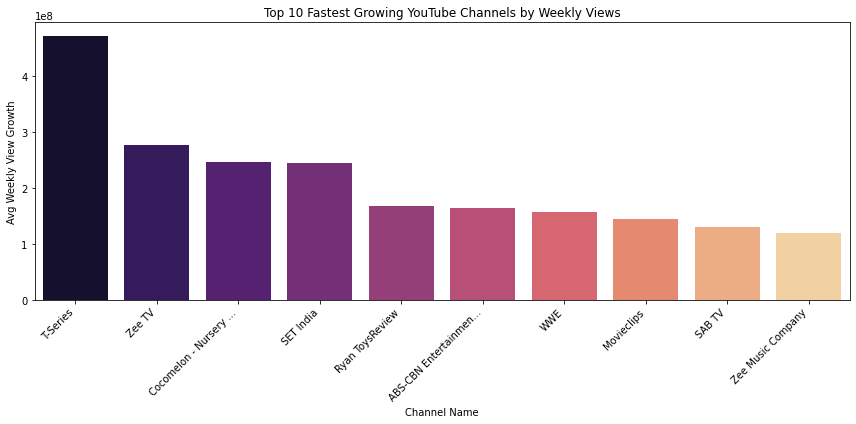

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_growing_views,
    x="name_cc",
    y="avg_weekly_view_growth",
    palette="magma"
)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Fastest Growing YouTube Channels by Weekly Views")
plt.ylabel("Avg Weekly View Growth")
plt.xlabel("Channel Name")
plt.tight_layout()
plt.show()


In [19]:
#1). Find channels that grow steadily vs. those with sudden spikes.
# Calculate standard deviation of weekly view change
volatility_df = timeseries_df.groupby("channel")["delta_views"].std().reset_index()
volatility_df.rename(columns={"delta_views": "view_growth_volatility"}, inplace=True)

# Merge with growth
growth_vol_df = pd.merge(growth_merged_df, volatility_df, on="channel")

# Sort: High growth, low volatility
steady_growers = growth_vol_df.sort_values(
    ["avg_weekly_view_growth", "view_growth_volatility"],
    ascending=[False, True]
).head(10)

print(steady_growers[["name_cc", "avg_weekly_view_growth", "view_growth_volatility"]])


                    name_cc  avg_weekly_view_growth  view_growth_volatility
54                 T-Series            4.722222e+08            1.883373e+08
53                   Zee TV            2.764331e+08            7.250917e+08
1   Cocomelon - Nursery ...            2.470951e+08            2.567241e+08
2                 SET India            2.437652e+08            1.032352e+08
47          Ryan ToysReview            1.667998e+08            5.036688e+07
44  ABS-CBN Entertainmen...            1.633275e+08            6.905900e+07
4                       WWE            1.577996e+08            4.924279e+07
17               Movieclips            1.437209e+08            6.322988e+07
31                   SAB TV            1.302305e+08            7.721967e+07
6         Zee Music Company            1.193527e+08            5.026000e+07


In [20]:
#2). Which content categories grow the fastest?
category_avg_growth = growth_merged_df.groupby("category_cc")[
    ["avg_weekly_view_growth", "avg_weekly_sub_growth"]
].mean().sort_values("avg_weekly_view_growth", ascending=False)

print(category_avg_growth)


                       avg_weekly_view_growth  avg_weekly_sub_growth
category_cc                                                         
Entertainment                   673416.748091            2133.735269
News & Politics                 588049.650366            1839.311409
Music                           510213.556605            1521.641820
Film and Animation              490021.523424            1449.186031
Comedy                          461228.576489            2111.765227
Education                       431997.341228            1784.182778
Pets & Animals                  382104.669282            1382.777184
Sports                          295198.131347             989.515778
Gaming                          268463.114158            1059.658215
People & Blogs                  218894.501541            1176.465228
Science & Technology            210023.617727            1094.129509
Howto & Style                   198933.561074            1237.030898
Autos & Vehicles                16

In [21]:
#3). Which channels gain more subscribers per view?
growth_merged_df["subs_per_view"] = (
    growth_merged_df["avg_weekly_sub_growth"] / growth_merged_df["avg_weekly_view_growth"]
)

efficient_growth = growth_merged_df.sort_values("subs_per_view", ascending=False).head(10)
print(efficient_growth[["name_cc", "category_cc", "subs_per_view"]])


                  name_cc     category_cc  subs_per_view
21617    The Eades Family  People & Blogs            inf
20107           AyyOnline          Comedy            inf
133503             Jahesh          Sports      12.545353
420     Justin Timberlake           Music       6.032855
72172            CryptoGo   Entertainment       5.112464
96205      SarmadGamingTV          Gaming       4.609814
415                Halsey           Music       4.363869
98           ChrisBrownTV           Music       4.279381
279        Meghan Trainor  People & Blogs       3.546971
3346             Kodaline           Music       3.069471


<AxesSubplot:title={'center':'Avg View Growth by Join Year'}, xlabel='join_year'>

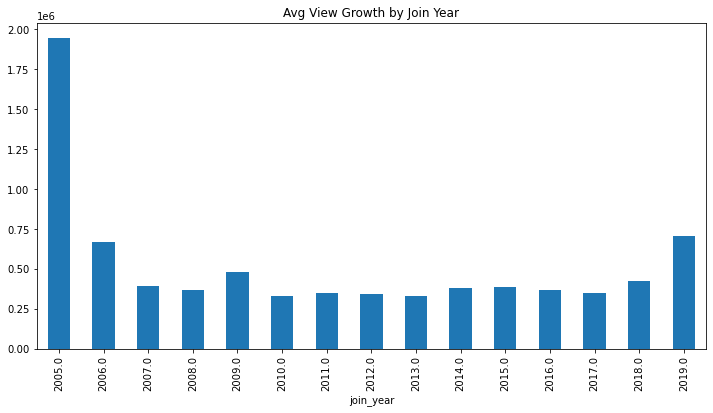

In [22]:
#4).  Does being early on YouTube help growth?
# Convert join_date to datetime
growth_merged_df["join_date"] = pd.to_datetime(growth_merged_df["join_date"], errors='coerce')

# Plot join year vs growth
growth_merged_df["join_year"] = growth_merged_df["join_date"].dt.year

avg_growth_by_year = growth_merged_df.groupby("join_year")["avg_weekly_view_growth"].mean()

avg_growth_by_year.plot(kind="bar", figsize=(12,6), title="Avg View Growth by Join Year")


In [23]:
#5). Find channels with negative growth — they're losing viewers!

losers = growth_merged_df[
    (growth_merged_df["avg_weekly_view_growth"] < 0) |
    (growth_merged_df["avg_weekly_sub_growth"] < 0)
].sort_values("avg_weekly_view_growth").head(10)

print(losers[["name_cc", "category_cc", "avg_weekly_view_growth", "avg_weekly_sub_growth"]])

Empty DataFrame
Columns: [name_cc, category_cc, avg_weekly_view_growth, avg_weekly_sub_growth]
Index: []


<AxesSubplot:title={'center':'Weekly Views/Subscribers for T-Series'}, xlabel='datetime'>

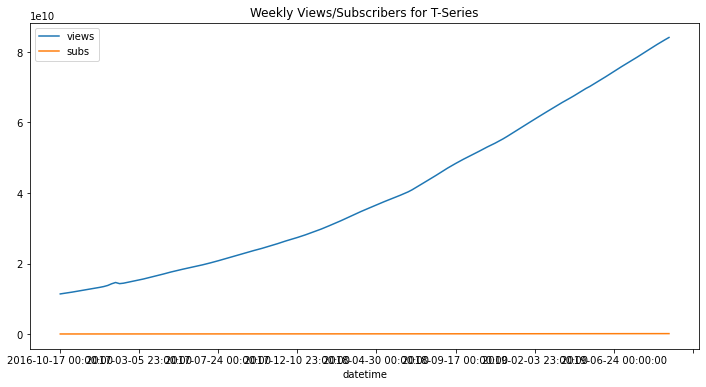

In [24]:
#6). Plot week-by-week growth for a specific channel.

channel_id = top_growing_views.iloc[0]["channel"]  # or any specific ID

channel_history = timeseries_df[timeseries_df["channel"] == channel_id]

channel_history.plot(
    x="datetime", y=["views", "subs"], figsize=(12,6),
    title=f"Weekly Views/Subscribers for {top_growing_views.iloc[0]['name_cc']}"
)

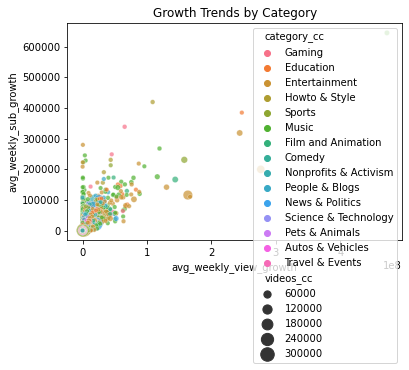

In [25]:
#Build a category-wise scatter plot of views vs. subscribers with size = video count.
sns.scatterplot(
    data=growth_merged_df,
    x="avg_weekly_view_growth",
    y="avg_weekly_sub_growth",
    hue="category_cc",
    size="videos_cc",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Growth Trends by Category")
plt.show()


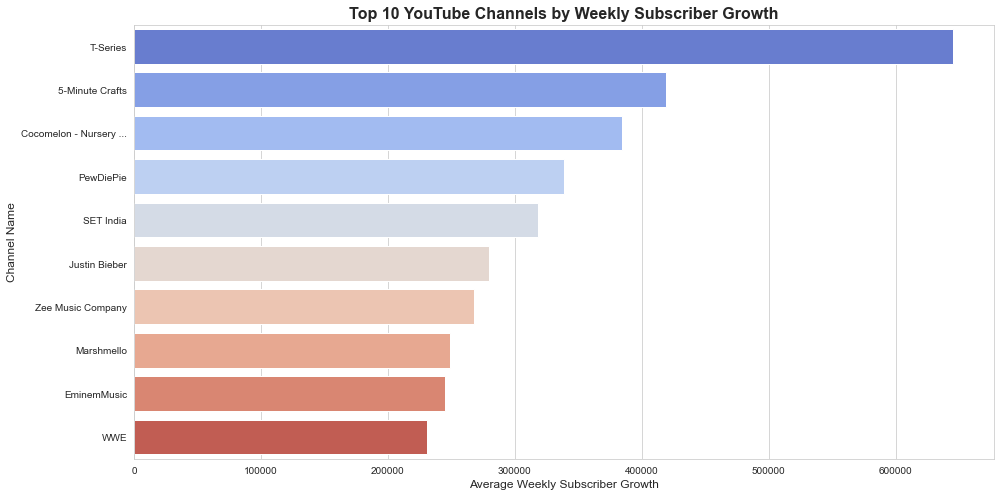

In [27]:
# Visualization 1). Top 10 Channels by Weekly Subscriber Growth

import seaborn as sns
import matplotlib.pyplot as plt

top_subs = growth_merged_df.sort_values("avg_weekly_sub_growth", ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.barplot(
    data=top_subs,
    x="avg_weekly_sub_growth",
    y="name_cc",
    palette="coolwarm"
)

plt.title("Top 10 YouTube Channels by Weekly Subscriber Growth", fontsize=16, fontweight='bold')
plt.xlabel("Average Weekly Subscriber Growth", fontsize=12)
plt.ylabel("Channel Name", fontsize=12)
plt.tight_layout()
plt.show()

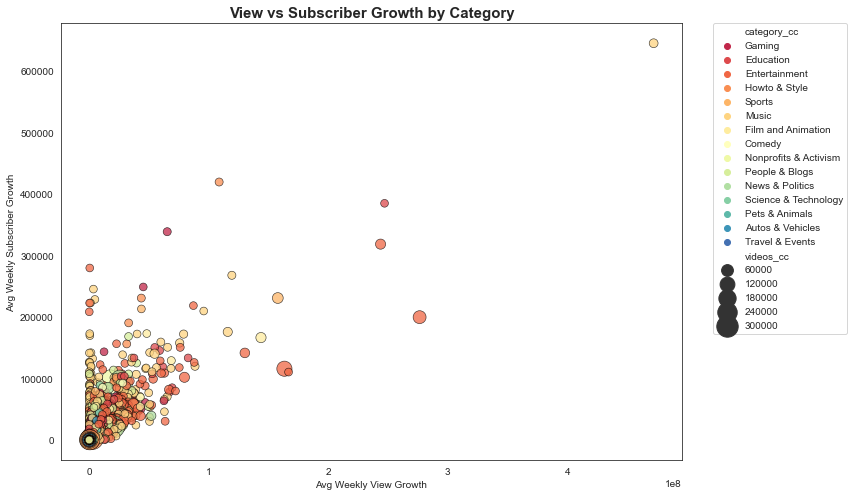

In [29]:
# Visualization 2). View vs Subscriber Growth (Bubble Chart)

plt.figure(figsize=(12, 7))
sns.set_style("white")

scatter = sns.scatterplot(
    data=growth_merged_df,
    x="avg_weekly_view_growth",
    y="avg_weekly_sub_growth",
    hue="category_cc",
    size="videos_cc",
    sizes=(60, 500),
    alpha=0.75,
    edgecolor="black",
    palette="Spectral"
)

plt.title("View vs Subscriber Growth by Category", fontsize=15, fontweight='bold')
plt.xlabel("Avg Weekly View Growth")
plt.ylabel("Avg Weekly Subscriber Growth")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

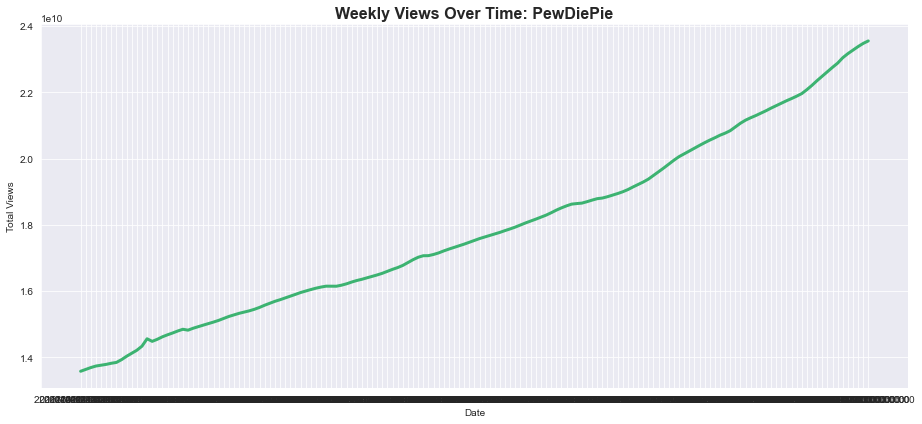

In [31]:
# Visualization 3). Weekly Views Over Time (Single Channel)
channel_id = growth_merged_df.iloc[0]["channel"]
channel_name = growth_merged_df.iloc[0]["name_cc"]
channel_ts = timeseries_df[timeseries_df["channel"] == channel_id]

plt.figure(figsize=(13, 6))
sns.set_style("darkgrid")
sns.lineplot(data=channel_ts, x="datetime", y="views", color="mediumseagreen", linewidth=3)

plt.title(f"Weekly Views Over Time: {channel_name}", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.tight_layout()
plt.show()


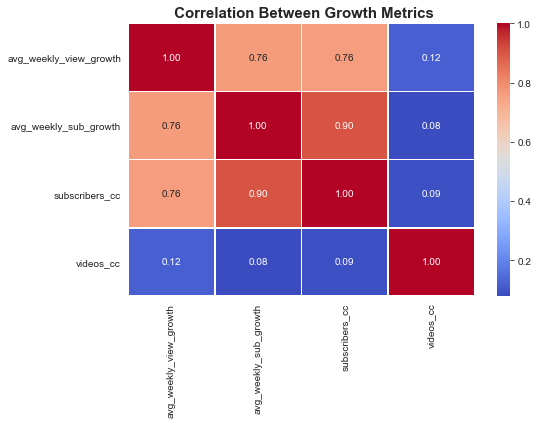

In [32]:
# Visualization 4). Heatmap of Growth Metric Correlations

numeric_cols = growth_merged_df[[
    "avg_weekly_view_growth", "avg_weekly_sub_growth", "subscribers_cc", "videos_cc"
]]
corr = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title(" Correlation Between Growth Metrics", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

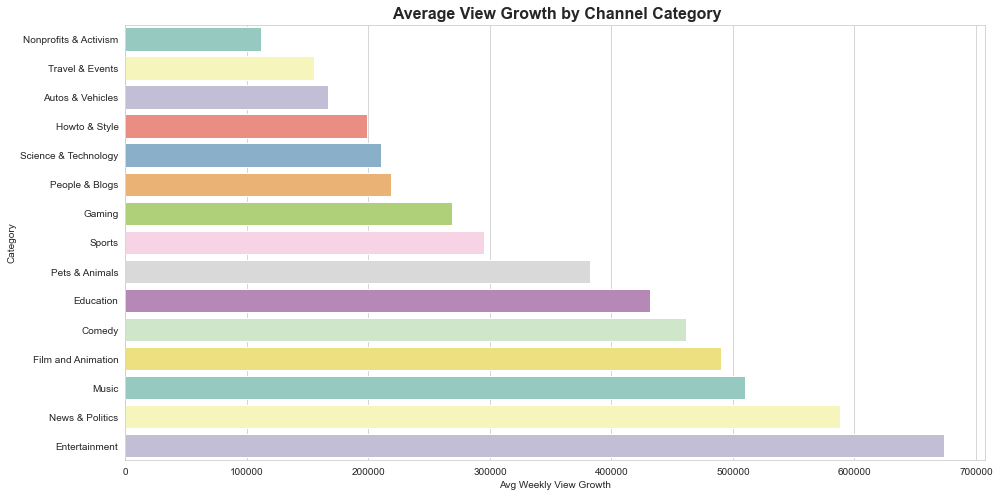

In [34]:
# Visualization 5).Average Growth by Category (Bar Plot)

cat_avg = growth_merged_df.groupby("category_cc")["avg_weekly_view_growth"].mean().sort_values(ascending=True)

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
colors = sns.color_palette("Set3", len(cat_avg))

sns.barplot(
    x=cat_avg.values,
    y=cat_avg.index,
    palette=colors
)

plt.title(" Average View Growth by Channel Category", fontsize=16, fontweight='bold')
plt.xlabel("Avg Weekly View Growth")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [37]:
# app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(layout="wide")

@st.cache_data

def load_data():
    channels_df = pd.read_csv("C:/Users/Lenovo/Downloads/media_dashboard_project/data/df_channels_en.tsv.gz", sep="\t")
    timeseries_df = pd.read_csv("C:/Users/Lenovo/Downloads/media_dashboard_project/data/df_timeseries_en.tsv.gz", sep="\t")
    return channels_df, timeseries_df

# Load data
channels_df, timeseries_df = load_data()

# Preprocess
growth_df = timeseries_df.groupby('channel').agg({
    'delta_views': 'mean',
    'delta_subs': 'mean'
}).reset_index()
growth_df.rename(columns={
    'delta_views': 'avg_weekly_view_growth',
    'delta_subs': 'avg_weekly_sub_growth'
}, inplace=True)

channels_df = channels_df.rename(columns={"channel_id": "channel"})
growth_merged_df = pd.merge(channels_df, growth_df, on="channel")
growth_merged_df["subs_per_view"] = growth_merged_df["avg_weekly_sub_growth"] / growth_merged_df["avg_weekly_view_growth"]

# Sidebar filters
st.sidebar.header("Filters")
categories = st.sidebar.multiselect("Select Categories", options=growth_merged_df["category_cc"].unique(), default=growth_merged_df["category_cc"].unique())
view_range = st.sidebar.slider("View Growth Range", float(growth_merged_df["avg_weekly_view_growth"].min()), float(growth_merged_df["avg_weekly_view_growth"].max()), (0.0, float(growth_merged_df["avg_weekly_view_growth"].max())))

# Filtered data
filtered_df = growth_merged_df[
    (growth_merged_df["category_cc"].isin(categories)) &
    (growth_merged_df["avg_weekly_view_growth"] >= view_range[0]) &
    (growth_merged_df["avg_weekly_view_growth"] <= view_range[1])
]

# Main dashboard
st.title("📊 YouTube Channel Growth Dashboard")
st.markdown("Explore performance trends of top YouTube channels by category, view growth, and subscriber growth.")

col1, col2 = st.columns(2)

# Top 10 Subscriber Growth
with col1:
    top_subs = filtered_df.sort_values("avg_weekly_sub_growth", ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(data=top_subs, x="avg_weekly_sub_growth", y="name_cc", palette="coolwarm", ax=ax)
    ax.set_title("Top 10 Channels by Subscriber Growth")
    st.pyplot(fig)

# Top 10 View Growth
with col2:
    top_views = filtered_df.sort_values("avg_weekly_view_growth", ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(data=top_views, x="avg_weekly_view_growth", y="name_cc", palette="viridis", ax=ax)
    ax.set_title("Top 10 Channels by View Growth")
    st.pyplot(fig)

# Scatter plot
st.subheader("📈 Views vs Subscribers Growth by Category")
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(
    data=filtered_df,
    x="avg_weekly_view_growth",
    y="avg_weekly_sub_growth",
    hue="category_cc",
    size="videos_cc",
    sizes=(40, 400),
    alpha=0.7,
    ax=ax
)
plt.xlabel("Avg Weekly View Growth")
plt.ylabel("Avg Weekly Subscriber Growth")
st.pyplot(fig)

# Show data
st.subheader("📋 Filtered Data Table")
st.dataframe(filtered_df[["name_cc", "category_cc", "avg_weekly_view_growth", "avg_weekly_sub_growth", "subs_per_view"]].sort_values("avg_weekly_view_growth", ascending=False))


ModuleNotFoundError: No module named 'streamlit'